>出处 https://colab.research.google.com/github/pratapvardhan/notebooks/blob/master/barchart-race-matplotlib.ipynb


# 动图

这种图在国外叫做 Bar Chart Race， 通过这个图可以察公司沉浮，观国家兴衰。

我使用了中文数据对其进行了测试，能实现其中80%的功效，虽然不如原作者的完美漂亮，但是也基本可以够用了。

### 读取航空客运量数据

在国家统计局 http://data.stats.gov.cn/easyquery.htm?cn=C01 下载了主要国家(地区)年度航空客运量数据

In [87]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_excel('国际数据主要国家(地区)年度数据.xls', skiprows=[0, 1, 2])
df.head()

,地区,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,...,1979年,1978年,1977年,1976年,1975年,1974年,1973年,1972年,1971年,1970年
0,阿富汗,1929908.0,2209428.0,2044188.0,1737962.0,2279341.0,1999127.0,NaN,NaN,NaN,...,93000.0,100400.0,111200.0,101700.0,99000.0,96100.0,96600.0,104900.0,97400.0,84700.0
1,巴林,5313756.0,5171496.0,4626648.0,5861787.0,5590998.0,6028980.0,5215512.0,NaN,NaN,...,456500.0,374500.0,299800.0,240100.0,173000.0,127500.0,350000.0,320000.0,280000.0,241000.0
2,孟加拉国,2906799.0,2761656.0,2781708.0,2195062.0,2022389.0,1818901.0,1409414.0,1224222.0,1242865.0,...,624200.0,544200.0,470300.0,453300.0,490500.0,431400.0,490000.0,NaN,NaN,NaN
3,不丹,162864.0,302160.0,207996.0,193405.0,226153.0,181537.0,49056.0,52805.0,53609.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,文莱,1150003.0,1061148.0,1139784.0,1044170.0,1312935.0,1263270.0,999375.0,1075754.0,1017028.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


咱们先只看2001年排名前10个国家

In [88]:
df2 = df[['地区', '2001年']].sort_values(by='2001年', ascending=False).head(10)
df2.sort_values(by='2001年', ascending=True, inplace=True)
df2

,地区,2001年
34,土耳其,10603908.0
10,印度尼西亚,12453812.0
28,沙特阿拉伯,12835735.0
19,马来西亚,16107156.0
29,新加坡,16373648.0
11,伊朗,16485326.0
9,印度,16862737.0
33,泰国,17662418.0
30,韩国,33710340.0
14,日本,107823469.0


### 基础图
先看看最基础的样子，有点简陋

<BarContainer object of 10 artists>

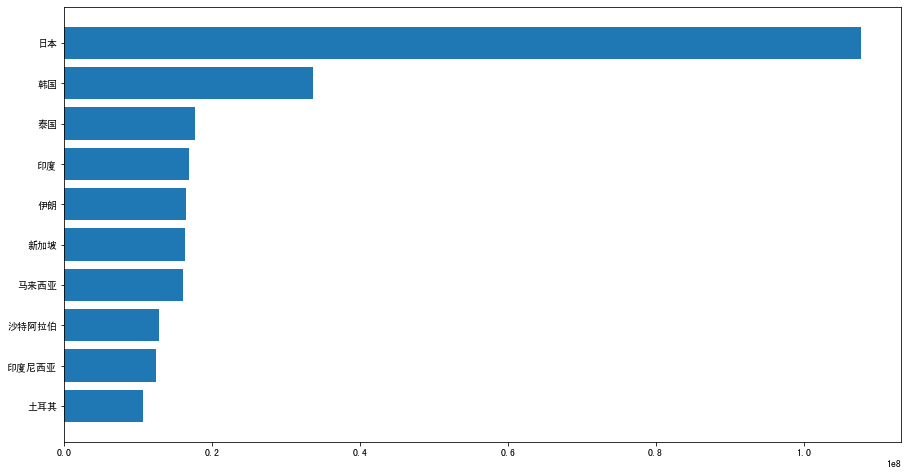

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

#显示中文（可能还会显示不了，请自行百度解决中文问题）
plt.rcParams['font.sans-serif']=['SimHei']

fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df2['地区'], df2['2001年'])

### 颜色标签
我们给城市条形图配上颜色，这里原作者使用了7种颜色的rgb码。

我的新数据有47个国家，所以7种颜色重复使用了好几次。

注意： 城市和颜色都是长度47

In [90]:
colors = ['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50', 
         '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
         '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
         '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
         '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
          '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',
          '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff']

#给每个国家随机分配颜色
countrycolors = dict()
countrys = set(df['地区'])
for color, country in zip(colors, countrys):
    countrycolors[country] = color
    
countrycolors

{'巴勒斯坦': '#adb0ff',
 '伊拉克': '#ffb3ff',
 '越南': '#90d595',
 '土库曼斯坦': '#e48381',
 '阿曼': '#aafbff',
 '乌兹别克斯坦': '#f7bb5f',
 '塞浦路斯': '#eafb50',
 '新加坡': '#adb0ff',
 '柬埔寨': '#ffb3ff',
 '伊朗': '#90d595',
 '土耳其': '#e48381',
 '注：数据来源于世界银行等国际组织。': '#aafbff',
 '东帝汶': '#f7bb5f',
 '缅甸': '#eafb50',
 '卡塔尔': '#adb0ff',
 '也门': '#ffb3ff',
 '印度尼西亚': '#90d595',
 '约旦河西岸和加沙': '#e48381',
 '不丹': '#aafbff',
 '吉尔吉斯斯坦': '#f7bb5f',
 '哈萨克斯坦': '#eafb50',
 '黎巴嫩': '#adb0ff',
 '以色列': '#ffb3ff',
 '巴基斯坦': '#90d595',
 '约旦': '#e48381',
 '巴林': '#aafbff',
 '日本': '#f7bb5f',
 '泰国': '#eafb50',
 '蒙古': '#adb0ff',
 '科威特': '#ffb3ff',
 '马尔代夫': '#90d595',
 '菲律宾': '#e48381',
 '叙利亚': '#aafbff',
 '马来西亚': '#f7bb5f',
 '阿联酋': '#eafb50',
 '文莱': '#adb0ff',
 '朝鲜': '#ffb3ff',
 '沙特阿拉伯': '#90d595',
 '阿富汗': '#e48381',
 '塔吉克斯坦': '#aafbff',
 '数据来源：国家统计局': '#f7bb5f',
 '孟加拉国': '#eafb50',
 '斯里兰卡': '#adb0ff',
 '韩国': '#ffb3ff',
 '老挝': '#90d595',
 '尼泊尔': '#e48381',
 '印度': '#aafbff'}

Text(1, 0.45, '2001年')

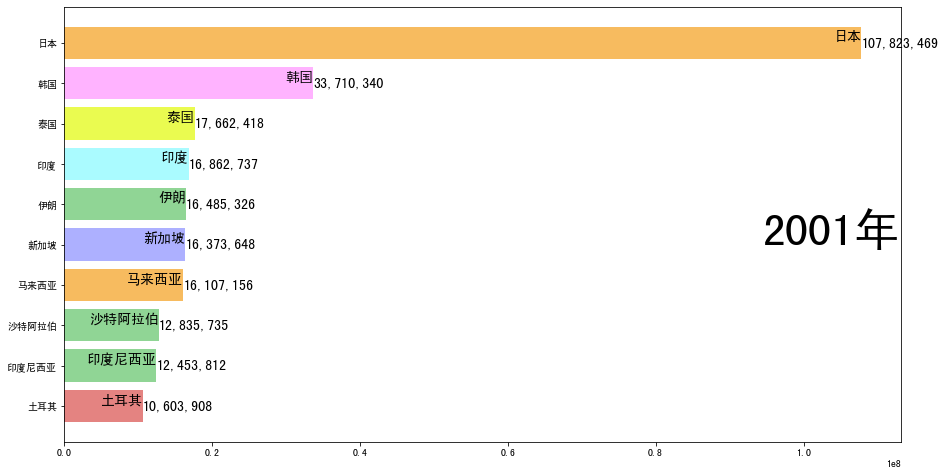

In [91]:
fig, ax = plt.subplots(figsize=(15, 8))

#排名前10的国家
ax.barh(df2['地区'], df2['2001年'], color=[countrycolors[c] for c in df2['地区']])
for i, (value, country) in enumerate(zip(df2['2001年'], df2['地区'])):
        ax.text(value, i,     country,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
ax.text(1, 0.45, '2001年', transform=ax.transAxes, size=46, ha='right')

### 细节修饰
在上面我们实现了2001年各国航空客运量（人数）排名前10的可视化，现在我们将其封装进draw_barchart函数中。

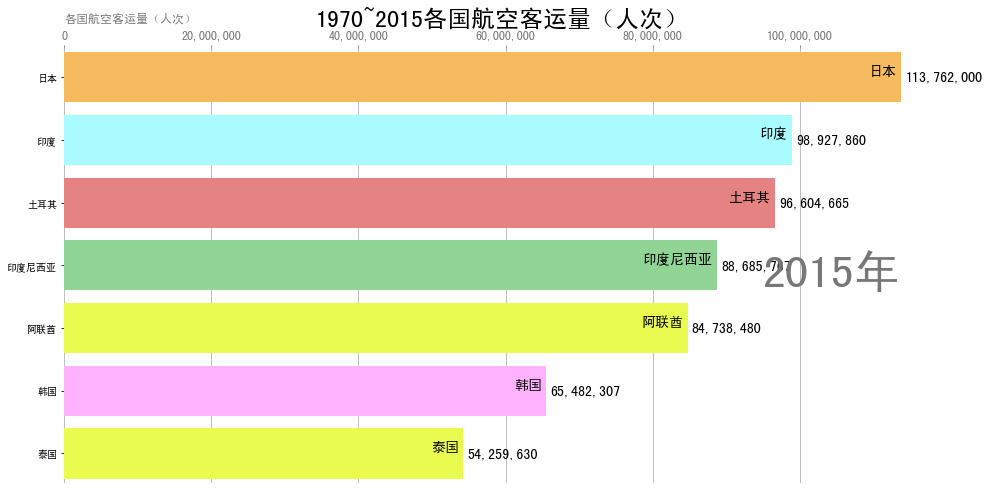

In [92]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(year):
    #整理数据
    year = str(year)+'年'
    df = pd.read_excel('国际数据主要国家(地区)年度数据.xls', skiprows=[0, 1, 2])
    df2 = df[['地区', year]].sort_values(by=year, ascending=False).head(7)
    df2.sort_values(by=year, ascending=True, inplace=True)
    
    #横向条形图
    ax.clear()
    ax.barh(df2['地区'], df2[year], color=[countrycolors[country] for country in df2['地区']])
    dx = df[year].max()/200
    
    for i, (value, country) in enumerate(zip(df2[year], df2['地区'])):
        ax.text(value-dx, i,     country,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
        
        
    #细节修饰
    ax.text(1, 0.45, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, '各国航空客运量（人次）', transform=ax.transAxes, size=12, color='#777777')
    
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)

    
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0.3, 1.05, '1970~2015各国航空客运量（人次）',
           transform=ax.transAxes, size=24, weight=600, ha='left')
    
    plt.box(False)
    
 
draw_barchart(2015)

### 爆燃动画
刚刚我们已经封装好了draw_barchart(year)函数，现在我们只需要简单的调用matplotlib中的animation模块，就可以顺着时间方向，渲染成动画效果。

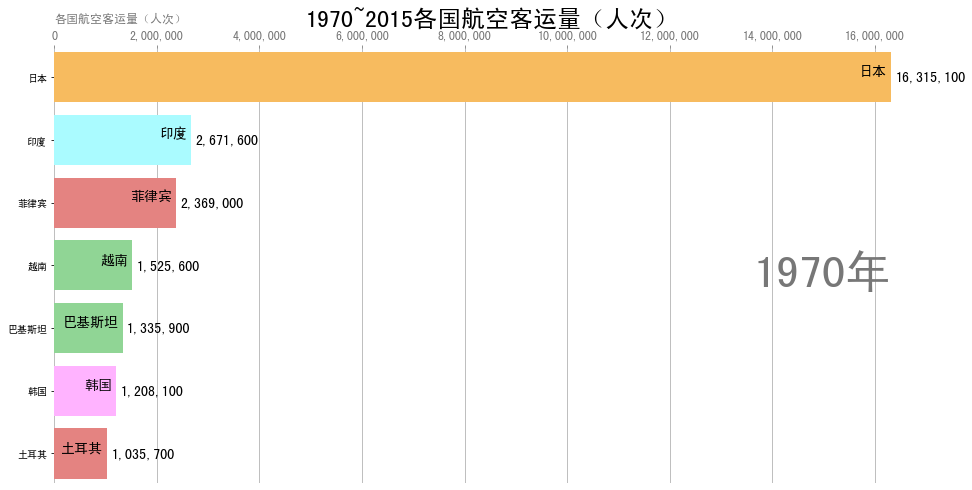

In [93]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1970, 2016))
HTML(animator.to_jshtml())

动态排名图可以输出为视频文件，会视频剪辑的还可以加上自己喜欢的bgm，让整个效果更加爆燃。不过在输出视频前，需要先安装好ffmpeg，这里只稍微说一下安装步骤：
1. 命令行安装homebrew
2. 命令行输入 brew install ffmpeg
上述安装步骤有疑问请自行百度

In [ ]:
animator.to_html5_video()
animator.save('countryflys.mp4')

### 全部代码
不到40行代码的超然动态排序图

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
#显示中文（可能还会显示不了，请自行百度解决中文问题）
plt.rcParams['font.sans-serif']=['SimHei']

def draw_barchart(year):
    #整理数据
    year = str(year)+'年'
    df = pd.read_excel('国际数据主要国家(地区)年度数据.xls', skiprows=[0, 1, 2])
    df2 = df[['地区', year]].sort_values(by=year, ascending=False).head(7)
    df2.sort_values(by=year, ascending=True, inplace=True)
    #横向条形图
    ax.clear()
    ax.barh(df2['地区'], df2[year], color=[countrycolors[country] for country in df2['地区']])
    dx = df[year].max()/200
    for i, (value, country) in enumerate(zip(df2[year], df2['地区'])):
        ax.text(value-dx, i,     country,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')   
    #细节修饰
    ax.text(1, 0.45, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, '各国航空客运量（人次）', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0.3, 1.05, '1970~2015各国航空客运量（人次）',
           transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
    
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1970, 2016))
HTML(animator.to_jshtml())